# **Building an Image Classifier using Artificial Neural Networks**



In [138]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [139]:
import tensorflow as tf
from tensorflow import keras

In [140]:
tf.__version__

'2.3.0'

In [141]:
keras.__version__

'2.4.0'

# DATASET:

**Link :**

          https://keras.io/api/datasets/fashion_mnist/




**Dataset Summary:**

          This is a dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images. This dataset can be used as a drop-in replacement for MNIST. The class labels are:




**Label	Description:**

          0	T-shirt/top

          1	Trouser

          2	Pullover

          3	Dress

          4	Coat

          5	Sandal

          6	Shirt

          7	Sneaker

          8	Bag

          9	Ankle boot




**Returns:**

        Tuple of Numpy arrays: (x_train, y_train), (x_test, y_test).

        x_train, x_test: uint8 arrays of grayscale image data with shape (num_samples, 28, 28).

        y_train, y_test: uint8 arrays of labels (integers in range 0-9) with shape (num_samples,).

In [142]:
fashion_mnist  =   keras.datasets.fashion_mnist

In [143]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

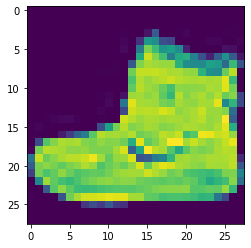

In [144]:
plt.imshow(x_train[0])  # image at 0th position

In [145]:
y_train[0]  # output is label 9, 9 represents Ankle boot as described in label description

9

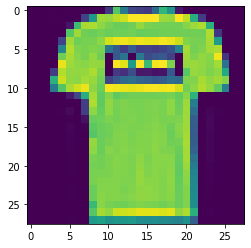

In [146]:
plt.imshow(x_train[1])

In [147]:
y_train[1] # output is label 0, 0 represents Tshirt/Top as described in label description

0

Instead of calling the labels i.e. 0-9 we can call the label names by defining the class names which would return T-shirt/Top instead of 0, ankle boots instead of 9 and so on

In [148]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat', 'Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [149]:
class_names[y_train[0]]

'Ankle boot'

In [150]:
class_names[y_train[1]]

'T-shirt/top'

In [151]:
x_train[5]   # 28x28 pixel array per image

array([[  0,   0,   0,   0,   1,   0,   0,   0,   0,  22,  88, 188, 172,
        132, 125, 141, 199, 143,   9,   0,   0,   0,   1,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,  20, 131, 199, 206, 196, 202, 242,
        255, 255, 250, 222, 197, 206, 188, 126,  17,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,  35, 214, 191, 183, 178, 175, 168, 150,
        162, 159, 152, 158, 179, 183, 189, 195, 185,  82,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 170, 190, 172, 177, 176, 171, 169, 162,
        155, 148, 154, 169, 174, 175, 175, 177, 183, 188,  12,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  25, 194, 180, 178, 174, 184, 187, 189, 187,
        184, 181, 189, 200, 197, 193, 190, 178, 175, 194,  90,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  42, 218, 191, 197, 208, 204, 211, 209, 210,
        212, 211, 214, 215, 213, 214, 211, 211, 191, 200, 158,   0,   0,
          0,   0],
       [  

# DATA NORMALIZATION:

Every image is a 28 x 28 pixel 2D array with image intensities lying between 0 and 255 where 0 represents black and 255 represnts white.
Since we are going to perform Gradient Descent optimization we shall restrict our pixel intensities between 0 and 1. 



In [152]:
x_train_n = x_train / 255
x_test_n = x_test / 255

# SPLITTING DATA:

**Split the data into train, validation, test datasets:**

In the earlier step of importing the date, we had 60,000 datasets for training and 10,000 test datasets. Now we further split the training data into train/validation. Here is how each type of dateset is used in deep learning:

**Training data:**

used for training the model


**Validation data:**

used for tuning the hyperparameters and evaluate the models


**Test data:**

used to test the model after the model has gone through initial vetting by the validation set.

In [153]:
X_valid,  X_train =  x_train_n[:5000], x_train_n[5000:]
y_valid,  y_train =  y_train[:5000], y_train[5000:]
X_test = x_test_n

In [154]:
X_valid

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

# MODEL CREATION:

**Models API:**

There are three ways to create Keras models:

***The Sequential API***, which is very straightforward (a simple list of layers), but is limited to single-input, single-output stacks of layers (as the name gives away).


***The Functional API***, which is an easy-to-use, fully-featured API that supports arbitrary model architectures. For most people and most use cases, this is what you should be using. This is the Keras "industry strength" model.


***Model subclassing***, where you implement everything from scratch on your own. Use this if you have complex, out-of-the-box research use cases.

In [155]:
# to produce same output every time
np.random.seed(42)   
tf.random.set_seed(42)

# SEQUENTIAL MODEL API

# Creating a Sequential model.



In [156]:
model = keras.models.Sequential()

We have a 2D array of 28 x 28 pixels as input. We convert it to a 1D array to get 784 pixels in the input layer.

In [157]:
model.add(keras.layers.Flatten(input_shape=[28,28]))

Next we add Dense hidden layer with 300 neurons. It will use ReLU activation function. Then we add a second Dense layer with 100 neurons with ReLU activation function as well. 

In [158]:
model.add(keras.layers.Dense(300, activation = "relu"))
model.add(keras.layers.Dense(100, activation = "relu"))

Finally, we add a Dense output layer with 10 neurons (one per class), using the softmax activation function. Softmax activation function is used since the output is a multiclass output.

In [159]:
model.add(keras.layers.Dense(10, activation="softmax"))

Model’s summary() method display all the model layers, including each layers name, output shape of layers and number of parameters in each layer. This summary shows total number of parameters and number of trainable parameters and non-trainable parameters.

In [160]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_20 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_21 (Dense)             (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


parameters: 784 pixels x 300 neurons + 300 bias = 235500 parameters

Similarly other parameters are calculated.

# Visualizing the Model:

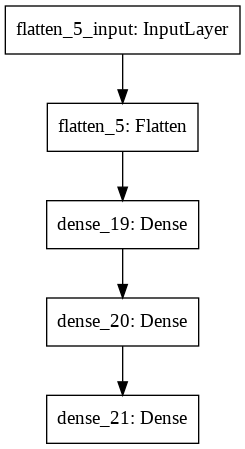

In [161]:
import pydot
keras.utils.plot_model(model)

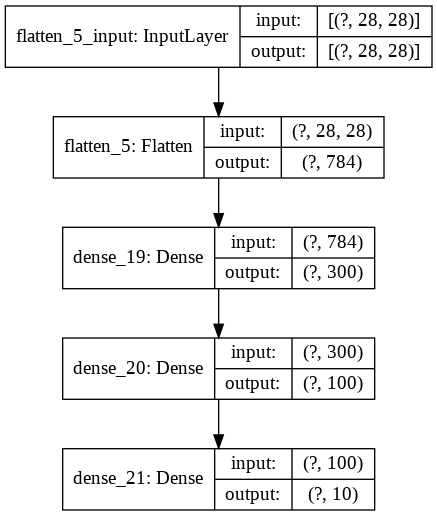

In [162]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

Access parameters using get_weights method.

In [163]:
weights, biases = model.layers[1].get_weights()

In [164]:
weights

array([[ 0.02448617, -0.00877795, -0.02189048, ..., -0.02766046,
         0.03859074, -0.06889391],
       [ 0.00476504, -0.03105379, -0.0586676 , ...,  0.00602964,
        -0.02763776, -0.04165364],
       [-0.06189284, -0.06901957,  0.07102345, ..., -0.04238207,
         0.07121518, -0.07331658],
       ...,
       [-0.03048757,  0.02155137, -0.05400612, ..., -0.00113463,
         0.00228987,  0.05581069],
       [ 0.07061854, -0.06960931,  0.07038955, ..., -0.00384101,
         0.00034875,  0.02878492],
       [-0.06022581,  0.01577859, -0.02585464, ..., -0.00527829,
         0.00272203, -0.06793761]], dtype=float32)

In [165]:
weights.shape

(784, 300)

In [166]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [167]:
biases.shape

(300,)

# Compiling the Model:

In [168]:
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Training the model:

In [169]:
model_history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid  ))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7237 - accuracy: 0.7643 - val_loss: 0.5213 - val_accuracy: 0.8226
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4842 - accuracy: 0.8318 - val_loss: 0.4353 - val_accuracy: 0.8526
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4391 - accuracy: 0.8458 - val_loss: 0.5304 - val_accuracy: 0.7996
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4123 - accuracy: 0.8566 - val_loss: 0.3916 - val_accuracy: 0.8650
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3939 - accuracy: 0.8622 - val_loss: 0.3745 - val_accuracy: 0.8690
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3752 - accuracy: 0.8675 - val_loss: 0.3718 - val_accuracy: 0.8724
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3631 - accuracy: 0.8716 - val_loss: 0.3616 - val_accuracy:

In [170]:
model_history.params

{'epochs': 30, 'steps': 1719, 'verbose': 1}

In [171]:
model_history.history

{'accuracy': [0.7643091082572937,
  0.831781804561615,
  0.8457818031311035,
  0.8565636277198792,
  0.8622363805770874,
  0.8675454258918762,
  0.8715817928314209,
  0.8747454285621643,
  0.8793454766273499,
  0.8820545673370361,
  0.8839091062545776,
  0.8865454792976379,
  0.8896363377571106,
  0.8916545510292053,
  0.8939999938011169,
  0.8971454501152039,
  0.8979091048240662,
  0.9006181955337524,
  0.902363657951355,
  0.9035817980766296,
  0.9055818319320679,
  0.9071454405784607,
  0.9085999727249146,
  0.9103817939758301,
  0.9126545190811157,
  0.9137818217277527,
  0.9155091047286987,
  0.9166181683540344,
  0.9180545210838318,
  0.9203454256057739],
 'loss': [0.7237027883529663,
  0.484192818403244,
  0.4390644133090973,
  0.41230905055999756,
  0.39393678307533264,
  0.37517988681793213,
  0.3631107211112976,
  0.3514234721660614,
  0.34116992354393005,
  0.3316737115383148,
  0.32377755641937256,
  0.31472039222717285,
  0.3077256381511688,
  0.30191129446029663,
  0.294

Plot Model History



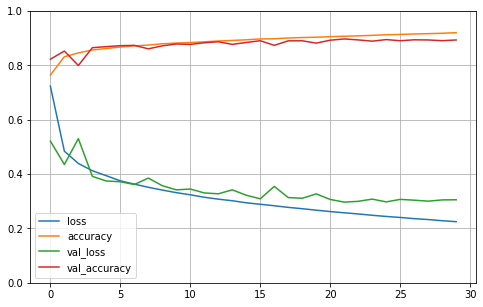

In [173]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

Here validation loss and loss and decresing whereas validation accuracy and accuracy are increasing. Its not converged yet.

# Evaluating Performance of the model:

In [174]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 2ms/step - loss: 0.3382 - accuracy: 0.8822


[0.3381877839565277, 0.8822000026702881]

accuracy is 88%. accuracy metrics were defined while compiling the model

# Predicting from the Model:

Predicting new data using the model:

In [175]:
X_new = X_test[:3]

Predicting probability of each class:

In [176]:
y_prob = model.predict(X_new)
y_prob

array([[5.25793212e-06, 3.32557221e-07, 6.20163337e-05, 7.49812853e-06,
        3.69853205e-06, 1.26089212e-02, 6.85248460e-06, 2.60237902e-02,
        7.94962863e-04, 9.60486650e-01],
       [1.21320618e-05, 2.26541665e-08, 9.86916423e-01, 1.12084662e-08,
        1.28277363e-02, 1.38747902e-11, 2.43661329e-04, 1.03369795e-11,
        7.90164911e-09, 2.88604626e-11],
       [2.80667018e-06, 9.99996543e-01, 2.28386838e-08, 4.44767608e-07,
        1.14245154e-07, 1.60227043e-13, 3.60827174e-10, 3.26340490e-13,
        9.81264581e-09, 1.97056802e-12]], dtype=float32)

In [177]:
y_prob.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.03, 0.  , 0.96],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

We have 3 arrays, Each array containing 10 records.

Predicting the classes:

In [178]:
y_pred = model.predict_classes(X_new)
y_pred

array([9, 2, 1])

In [179]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

AxesImage(54,36;334.8x217.44)


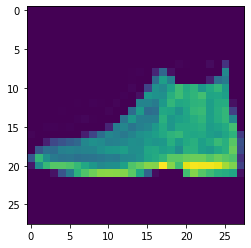

In [181]:
print(plt.imshow(X_test[0]))

AxesImage(54,36;334.8x217.44)


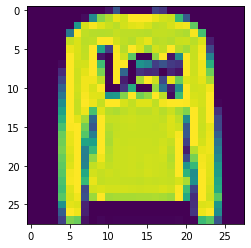

In [182]:
print(plt.imshow(X_test[1]))

AxesImage(54,36;334.8x217.44)


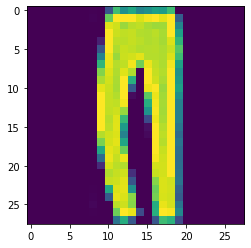

In [183]:
print(plt.imshow(X_test[2]))